In [5]:
import os 
import numpy as np
from ucf101dct import bres, UCF_SIZE, np_norm
import matplotlib.pyplot as plt

(298, 10)


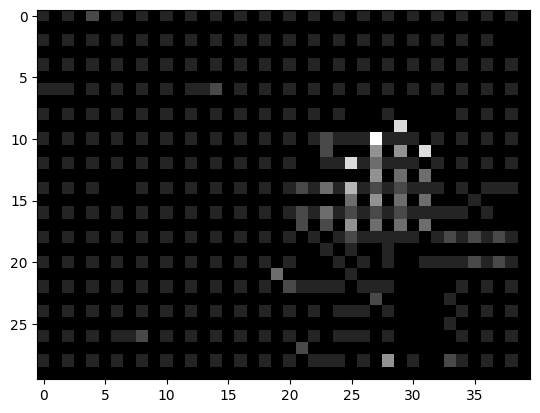

In [8]:
sample_file = "/home/tusco/videodct/data/UCF-101mv_5/ApplyEyeMakeup/v_ApplyEyeMakeup_g01_c01/frame_0032.npy"
mvs = np.load(sample_file)
print(mvs.shape)
arr = np.zeros((int(UCF_SIZE[0]/8),int(UCF_SIZE[1]/8)))
for mv in mvs:
    x1, y1 = mv[3], mv[4]
    x2, y2 = mv[5], mv[6]
    cx, cy = bres(x1,y1,x2,y2)
    for x, y in zip(cx, cy):
        if x >= UCF_SIZE[0] or y >= UCF_SIZE[1]:
            continue
        arr[int(x/8)-1][int(y/8)-1] += 1

if np.max(arr) == 1:
    arr[:] = 0
else:
    arr = np_norm(arr)

plt.gray()
plt.imshow(arr.transpose(1,0), interpolation='nearest')
plt.show()